# Linear Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import time
from ipywidgets import Output, HBox
from IPython.display import display, clear_output
from sklearn.datasets import make_blobs

In [19]:
X, y = datasets.make_regression(
        n_samples=50, n_features=1, noise=20, random_state=4, 
    )

In [20]:
X.shape, y.shape

((50, 1), (50,))

In [21]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

In [22]:
X.shape, y.shape

((50, 1), (50,))

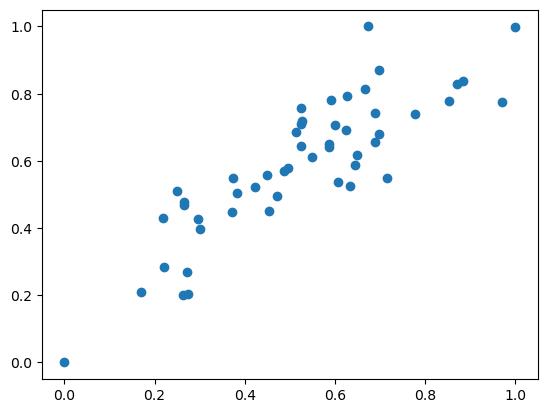

In [23]:
plt.scatter(X, y)

In [24]:
SEED = 42

In [25]:
np.random.seed(SEED)
W = np.random.randn(1)[0] * 10
b = np.random.randn(1)[0] * 10
W, b

(4.967141530112327, -1.3826430117118464)

In [26]:
def predict(weights, bias, X):
    return np.dot(X, weights) + bias

In [27]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [28]:
def hypothesis(W, b, X):
    return X * W + b

In [29]:
mean_squared_error(y, predict(W, b, X))

1.5808949587071282

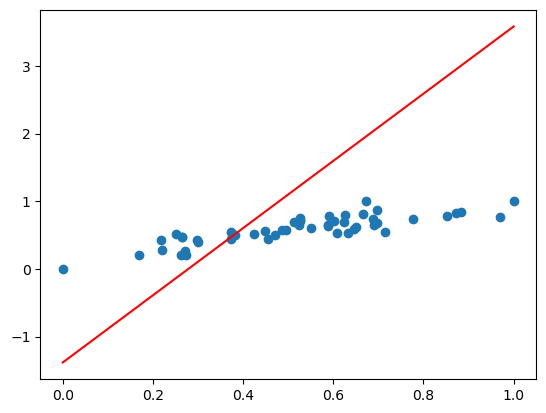

In [30]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])) , color='r')

In [31]:
def linearRegression(X, y, n_iters = 10000, learning_rate=0.1, visualize = False):

    if visualize:
        scater_out = Output()
        loss_out = Output()
        all_outs = HBox([scater_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in tqdm(range(n_iters)):
        y_predicted = np.dot(X, weights) + bias
        
        losses.append(mean_squared_error(y, y_predicted))
        # compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        # print(dw.shape)
        db = (1 / n_samples) * np.sum(y_predicted - y)
        # print(db.shape)
        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if visualize:
            with scater_out:
                clear_output(wait=True)
                plt.scatter(X, y)
                plt.plot(hypothesis(weights, bias, np.array([0, 1])) , color='r')
                plt.title('Hypothesis')
                plt.show(block=False)
            
            with loss_out:
                clear_output(wait=True)
                plt.plot(losses)
                plt.title('Loss curve')
                plt.show(block=False)
    
    return weights, bias


In [32]:
W, b = linearRegression(X, y)

100%|██████████| 10000/10000 [00:00<00:00, 73739.65it/s]


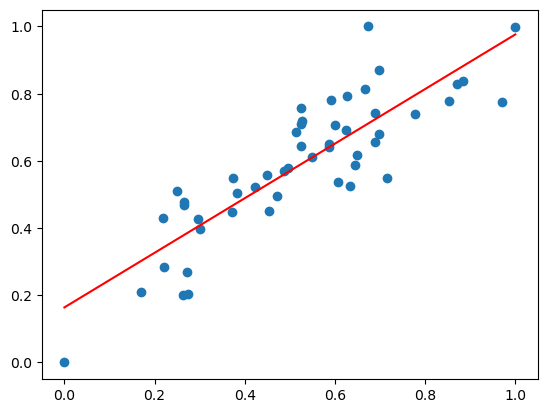

In [33]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])), color='r')

In [34]:
mean_squared_error(y, predict(W, b, X))

0.010994722836710246

In [35]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [36]:
def graph(W, b, range):  
    x = np.array(range)  
    y = (- b -W[0] * x) / W[1]
    plt.plot(x, y)  

In [37]:
X, y = make_blobs(n_samples=40, centers=2, n_features=2, cluster_std=5, random_state=11)
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

In [38]:
X.shape, y.shape

((40, 2), (40,))

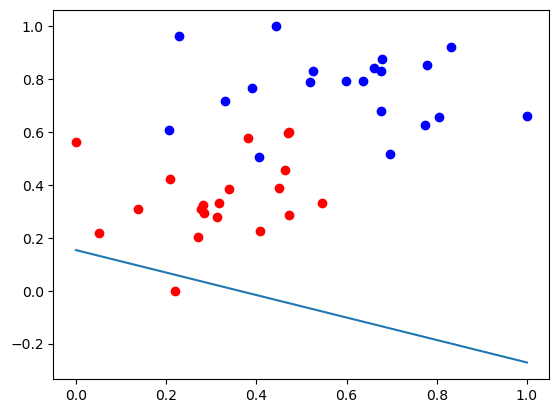

In [39]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
W = np.random.randn(2)
b = np.random.randn(1)
graph(W, b, [0, 1])

In [40]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [41]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred =  sigmoid(logits)
    return [1 if i > 0.5 else 0 for i in y_pred]

In [42]:
def logisticRegression(X, y, n_iters = 200, learning_rate=0.1, visualize = False):

    if visualize:
        scater_out = Output()
        loss_out = Output()
        all_outs = HBox([scater_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in tqdm(range(n_iters)):
        logits = np.dot(X, weights) + bias
        y_predicted = sigmoid(logits)

        losses.append(1 - accuracy(y, predict(X, weights, bias)))
        # compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        # print(dw.shape)
        db = (1 / n_samples) * np.sum(y_predicted - y)
        # print(db.shape)
        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if visualize:
            with scater_out:
                clear_output(wait=True)
                plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
                plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
                graph(weights, bias, [0, 1])
                plt.title('Hypothesis')
                plt.show(block=False)
            
            with loss_out:
                clear_output(wait=True)
                plt.plot(losses)
                plt.title('Loss curve')
                plt.show(block=False)
    
    return weights, bias


In [43]:
W, b = logisticRegression(X, y, visualize=True)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 1/200 [00:00<00:32,  6.09it/s]

  1%|          | 2/200 [00:00<00:28,  6.97it/s]

  2%|▏         | 3/200 [00:00<00:26,  7.37it/s]

  2%|▏         | 4/200 [00:00<00:28,  6.94it/s]

  2%|▎         | 5/200 [00:00<00:29,  6.66it/s]

  3%|▎         | 6/200 [00:00<00:27,  7.02it/s]

  4%|▎         | 7/200 [00:01<00:27,  7.12it/s]

  4%|▍         | 8/200 [00:01<00:28,  6.71it/s]

  4%|▍         | 9/200 [00:01<00:27,  7.00it/s]

  5%|▌         | 10/200 [00:01<00:31,  5.95it/s]

  6%|▌         | 11/200 [00:01<00:29,  6.31it/s]

  6%|▌         | 12/200 [00:01<00:29,  6.46it/s]

  6%|▋         | 13/200 [00:01<00:29,  6.44it/s]

  7%|▋         | 14/200 [00:02<00:27,  6.70it/s]

  8%|▊         | 15/200 [00:02<00:26,  6.94it/s]

  8%|▊         | 16/200 [00:02<00:26,  7.05it/s]

  8%|▊         | 17/200 [00:02<00:25,  7.20it/s]

  9%|▉         | 18/200 [00:02<00:26,  6.82it/s]

 10%|▉         | 19/200 [00:02<00:25,  6.98it/s]

 10%|█         | 20/200 [00:02<00:25,  6.93it/s]

 10%|█         | 21/200 [00:03<00:25,  6.92it/s]

 11%|█         | 22/200 [00:03<00:30,  5.87it/s]

 12%|█▏        | 23/200 [00:03<00:29,  5.92it/s]

 12%|█▏        | 24/200 [00:03<00:28,  6.22it/s]

 12%|█▎        | 25/200 [00:03<00:26,  6.52it/s]

 13%|█▎        | 26/200 [00:03<00:25,  6.72it/s]

 14%|█▎        | 27/200 [00:04<00:25,  6.90it/s]

 14%|█▍        | 28/200 [00:04<00:26,  6.56it/s]

 14%|█▍        | 29/200 [00:04<00:25,  6.83it/s]

 15%|█▌        | 30/200 [00:04<00:24,  7.06it/s]

 16%|█▌        | 31/200 [00:04<00:23,  7.11it/s]

 16%|█▌        | 32/200 [00:04<00:23,  7.25it/s]

 16%|█▋        | 33/200 [00:04<00:28,  5.88it/s]

 17%|█▋        | 34/200 [00:05<00:27,  6.03it/s]

 18%|█▊        | 35/200 [00:05<00:26,  6.11it/s]

 18%|█▊        | 36/200 [00:05<00:26,  6.31it/s]

 18%|█▊        | 37/200 [00:05<00:25,  6.41it/s]

 19%|█▉        | 38/200 [00:05<00:26,  6.12it/s]

 20%|█▉        | 39/200 [00:05<00:25,  6.41it/s]

 20%|██        | 40/200 [00:06<00:24,  6.64it/s]

 20%|██        | 41/200 [00:06<00:23,  6.68it/s]

 21%|██        | 42/200 [00:06<00:23,  6.69it/s]

 22%|██▏       | 43/200 [00:06<00:22,  7.04it/s]

 22%|██▏       | 44/200 [00:06<00:22,  6.92it/s]

 22%|██▎       | 45/200 [00:06<00:26,  5.96it/s]

 23%|██▎       | 46/200 [00:06<00:24,  6.39it/s]

 24%|██▎       | 47/200 [00:07<00:22,  6.77it/s]

 24%|██▍       | 48/200 [00:07<00:21,  7.11it/s]

 24%|██▍       | 49/200 [00:07<00:22,  6.71it/s]

 25%|██▌       | 50/200 [00:07<00:21,  6.85it/s]

 26%|██▌       | 51/200 [00:07<00:21,  7.07it/s]

 26%|██▌       | 52/200 [00:07<00:20,  7.12it/s]

 26%|██▋       | 53/200 [00:07<00:20,  7.02it/s]

 27%|██▋       | 54/200 [00:08<00:20,  6.98it/s]

 28%|██▊       | 55/200 [00:08<00:20,  6.96it/s]

 28%|██▊       | 56/200 [00:08<00:25,  5.59it/s]

 28%|██▊       | 57/200 [00:08<00:23,  6.05it/s]

 29%|██▉       | 58/200 [00:08<00:22,  6.30it/s]

 30%|██▉       | 59/200 [00:08<00:22,  6.24it/s]

 30%|███       | 60/200 [00:09<00:21,  6.53it/s]

 30%|███       | 61/200 [00:09<00:21,  6.44it/s]

 31%|███       | 62/200 [00:09<00:20,  6.75it/s]

 32%|███▏      | 63/200 [00:09<00:19,  7.00it/s]

 32%|███▏      | 64/200 [00:09<00:20,  6.62it/s]

 32%|███▎      | 65/200 [00:09<00:20,  6.64it/s]

 33%|███▎      | 66/200 [00:09<00:19,  6.96it/s]

 34%|███▎      | 67/200 [00:10<00:18,  7.07it/s]

 34%|███▍      | 68/200 [00:10<00:22,  5.88it/s]

 34%|███▍      | 69/200 [00:10<00:21,  6.19it/s]

 35%|███▌      | 70/200 [00:10<00:20,  6.37it/s]

 36%|███▌      | 71/200 [00:10<00:19,  6.65it/s]

 36%|███▌      | 72/200 [00:10<00:18,  6.98it/s]

 36%|███▋      | 73/200 [00:11<00:17,  7.18it/s]

 37%|███▋      | 74/200 [00:11<00:18,  6.80it/s]

 38%|███▊      | 75/200 [00:11<00:17,  7.02it/s]

 38%|███▊      | 76/200 [00:11<00:17,  7.10it/s]

 38%|███▊      | 77/200 [00:11<00:16,  7.26it/s]

 39%|███▉      | 78/200 [00:11<00:16,  7.31it/s]

 40%|███▉      | 79/200 [00:11<00:21,  5.66it/s]

 40%|████      | 80/200 [00:12<00:19,  6.11it/s]

 40%|████      | 81/200 [00:12<00:18,  6.54it/s]

 41%|████      | 82/200 [00:12<00:17,  6.90it/s]

 42%|████▏     | 83/200 [00:12<00:16,  7.24it/s]

 42%|████▏     | 84/200 [00:12<00:16,  6.90it/s]

 42%|████▎     | 85/200 [00:12<00:15,  7.21it/s]

 43%|████▎     | 86/200 [00:12<00:15,  7.56it/s]

 44%|████▎     | 87/200 [00:13<00:14,  7.73it/s]

 44%|████▍     | 88/200 [00:13<00:14,  7.97it/s]

 44%|████▍     | 89/200 [00:13<00:14,  7.50it/s]

 45%|████▌     | 90/200 [00:13<00:14,  7.56it/s]

 46%|████▌     | 91/200 [00:13<00:17,  6.41it/s]

 46%|████▌     | 92/200 [00:13<00:15,  6.84it/s]

 46%|████▋     | 93/200 [00:13<00:14,  7.23it/s]

 47%|████▋     | 94/200 [00:13<00:14,  7.43it/s]

 48%|████▊     | 95/200 [00:14<00:13,  7.61it/s]

 48%|████▊     | 96/200 [00:14<00:13,  7.66it/s]

 48%|████▊     | 97/200 [00:14<00:13,  7.62it/s]

 49%|████▉     | 98/200 [00:14<00:13,  7.76it/s]

 50%|████▉     | 99/200 [00:14<00:13,  7.24it/s]

 50%|█████     | 100/200 [00:14<00:13,  7.46it/s]

 50%|█████     | 101/200 [00:14<00:12,  7.65it/s]

 51%|█████     | 102/200 [00:15<00:12,  7.74it/s]

 52%|█████▏    | 103/200 [00:15<00:15,  6.47it/s]

 52%|█████▏    | 104/200 [00:15<00:15,  6.27it/s]

 52%|█████▎    | 105/200 [00:15<00:14,  6.67it/s]

 53%|█████▎    | 106/200 [00:15<00:13,  6.98it/s]

 54%|█████▎    | 107/200 [00:15<00:12,  7.28it/s]

 54%|█████▍    | 108/200 [00:15<00:12,  7.56it/s]

 55%|█████▍    | 109/200 [00:16<00:12,  7.55it/s]

 55%|█████▌    | 110/200 [00:16<00:11,  7.53it/s]

 56%|█████▌    | 111/200 [00:16<00:11,  7.71it/s]

 56%|█████▌    | 112/200 [00:16<00:11,  7.67it/s]

 56%|█████▋    | 113/200 [00:16<00:11,  7.70it/s]

 57%|█████▋    | 114/200 [00:16<00:13,  6.15it/s]

 57%|█████▊    | 115/200 [00:16<00:12,  6.63it/s]

 58%|█████▊    | 116/200 [00:17<00:11,  7.00it/s]

 58%|█████▊    | 117/200 [00:17<00:11,  7.16it/s]

 59%|█████▉    | 118/200 [00:17<00:11,  7.38it/s]

 60%|█████▉    | 119/200 [00:17<00:11,  7.24it/s]

 60%|██████    | 120/200 [00:17<00:10,  7.39it/s]

 60%|██████    | 121/200 [00:17<00:10,  7.50it/s]

 61%|██████    | 122/200 [00:17<00:10,  7.58it/s]

 62%|██████▏   | 123/200 [00:17<00:10,  7.64it/s]

 62%|██████▏   | 124/200 [00:18<00:10,  7.39it/s]

 62%|██████▎   | 125/200 [00:18<00:10,  7.49it/s]

 63%|██████▎   | 126/200 [00:18<00:11,  6.32it/s]

 64%|██████▎   | 127/200 [00:18<00:10,  6.68it/s]

 64%|██████▍   | 128/200 [00:18<00:10,  6.77it/s]

 64%|██████▍   | 129/200 [00:18<00:10,  6.53it/s]

 65%|██████▌   | 130/200 [00:19<00:10,  6.86it/s]

 66%|██████▌   | 131/200 [00:19<00:09,  7.12it/s]

 66%|██████▌   | 132/200 [00:19<00:09,  7.36it/s]

 66%|██████▋   | 133/200 [00:19<00:09,  7.41it/s]

 67%|██████▋   | 134/200 [00:19<00:09,  6.96it/s]

 68%|██████▊   | 135/200 [00:19<00:09,  7.07it/s]

 68%|██████▊   | 136/200 [00:19<00:08,  7.26it/s]

 68%|██████▊   | 137/200 [00:20<00:10,  6.19it/s]

 69%|██████▉   | 138/200 [00:20<00:09,  6.62it/s]

 70%|██████▉   | 139/200 [00:20<00:09,  6.55it/s]

 70%|███████   | 140/200 [00:20<00:08,  6.88it/s]

 70%|███████   | 141/200 [00:20<00:08,  7.13it/s]

 71%|███████   | 142/200 [00:20<00:07,  7.34it/s]

 72%|███████▏  | 143/200 [00:20<00:08,  6.93it/s]

 72%|███████▏  | 144/200 [00:21<00:07,  7.21it/s]

 72%|███████▎  | 145/200 [00:21<00:07,  7.35it/s]

 73%|███████▎  | 146/200 [00:21<00:07,  7.29it/s]

 74%|███████▎  | 147/200 [00:21<00:07,  7.31it/s]

 74%|███████▍  | 148/200 [00:21<00:08,  5.96it/s]

 74%|███████▍  | 149/200 [00:21<00:07,  6.40it/s]

 75%|███████▌  | 150/200 [00:21<00:07,  6.76it/s]

 76%|███████▌  | 151/200 [00:22<00:07,  6.95it/s]

 76%|███████▌  | 152/200 [00:22<00:06,  7.24it/s]

 76%|███████▋  | 153/200 [00:22<00:07,  6.69it/s]

 77%|███████▋  | 154/200 [00:22<00:06,  6.99it/s]

 78%|███████▊  | 155/200 [00:22<00:06,  7.23it/s]

 78%|███████▊  | 156/200 [00:22<00:06,  7.30it/s]

 78%|███████▊  | 157/200 [00:22<00:05,  7.34it/s]

 79%|███████▉  | 158/200 [00:23<00:06,  6.96it/s]

 80%|███████▉  | 159/200 [00:23<00:06,  5.98it/s]

 80%|████████  | 160/200 [00:23<00:06,  6.33it/s]

 80%|████████  | 161/200 [00:23<00:05,  6.66it/s]

 81%|████████  | 162/200 [00:23<00:05,  6.80it/s]

 82%|████████▏ | 163/200 [00:23<00:05,  6.53it/s]

 82%|████████▏ | 164/200 [00:23<00:05,  6.85it/s]

 82%|████████▎ | 165/200 [00:24<00:05,  6.96it/s]

 83%|████████▎ | 166/200 [00:24<00:04,  7.21it/s]

 84%|████████▎ | 167/200 [00:24<00:04,  7.31it/s]

 84%|████████▍ | 168/200 [00:24<00:04,  6.95it/s]

 84%|████████▍ | 169/200 [00:24<00:04,  7.11it/s]

 85%|████████▌ | 170/200 [00:24<00:05,  5.90it/s]

 86%|████████▌ | 171/200 [00:25<00:04,  6.33it/s]

 86%|████████▌ | 172/200 [00:25<00:04,  6.66it/s]

 86%|████████▋ | 173/200 [00:25<00:04,  6.47it/s]

 87%|████████▋ | 174/200 [00:25<00:03,  6.73it/s]

 88%|████████▊ | 175/200 [00:25<00:03,  6.88it/s]

 88%|████████▊ | 176/200 [00:25<00:03,  7.06it/s]

 88%|████████▊ | 177/200 [00:25<00:03,  7.22it/s]

 89%|████████▉ | 178/200 [00:25<00:03,  7.13it/s]

 90%|████████▉ | 179/200 [00:26<00:02,  7.27it/s]

 90%|█████████ | 180/200 [00:26<00:02,  7.36it/s]

 90%|█████████ | 181/200 [00:26<00:03,  6.22it/s]

 91%|█████████ | 182/200 [00:26<00:02,  6.59it/s]

 92%|█████████▏| 183/200 [00:26<00:02,  6.32it/s]

 92%|█████████▏| 184/200 [00:26<00:02,  6.61it/s]

 92%|█████████▎| 185/200 [00:27<00:02,  6.85it/s]

 93%|█████████▎| 186/200 [00:27<00:01,  7.02it/s]

 94%|█████████▎| 187/200 [00:27<00:01,  7.25it/s]

 94%|█████████▍| 188/200 [00:27<00:01,  6.77it/s]

 94%|█████████▍| 189/200 [00:27<00:01,  7.05it/s]

 95%|█████████▌| 190/200 [00:27<00:01,  7.20it/s]

 96%|█████████▌| 191/200 [00:27<00:01,  7.19it/s]

 96%|█████████▌| 192/200 [00:28<00:01,  6.17it/s]

 96%|█████████▋| 193/200 [00:28<00:01,  6.29it/s]

 97%|█████████▋| 194/200 [00:28<00:00,  6.58it/s]

 98%|█████████▊| 195/200 [00:28<00:00,  6.79it/s]

 98%|█████████▊| 196/200 [00:28<00:00,  7.04it/s]

 98%|█████████▊| 197/200 [00:28<00:00,  7.16it/s]

 99%|█████████▉| 198/200 [00:28<00:00,  6.88it/s]

100%|█████████▉| 199/200 [00:29<00:00,  6.98it/s]

100%|██████████| 200/200 [00:29<00:00,  6.84it/s]


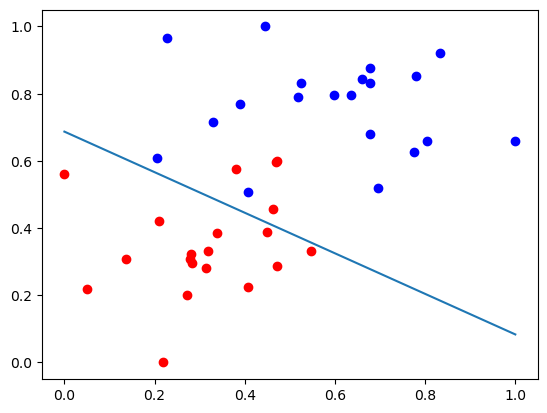

In [39]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
graph(W, b, [0, 1])

In [40]:
accuracy(predict(X, W, b) , y)

0.9